<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.
<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>
***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [2]:
        !pip install yfinance
!pip install bs4
!pip install nbformat

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [1]:
    import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function
In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**

## Question 1: Use yfinance to Extract Stock Data
Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.



In [2]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

print(tesla.info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [8]:
tesla_data = tesla.history(period="max")
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [9]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [17]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


html_data = requests.get(url).text


print(html_data[:100]) 


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [21]:
!pip install html5lib
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
print(soup.prettify())
html_data_content = html_data.content
html_data_content


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

AttributeError: 'str' object has no attribute 'content'

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [23]:
table = soup.find('table')
dates = []
revenues = []
for row in table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '') 
    dates.append(date)
    revenues.append(float(revenue)) 


tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})


print(tesla_revenue.head())

   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [24]:
print(tesla_revenue.tail())


    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


## Question 3: Use yfinance to Extract Stock Data
Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [25]:
import yfinance as yf
gamestop = yf.Ticker("GME")


print(gamestop)

yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [26]:
gme_data = gamestop.history(period="max")


print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [27]:
gme_data.reset_index(inplace=True)


print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data
Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [28]:
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


html_data_2= requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [29]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, 'html.parser')
print(soup.prettify()[:500]) 

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

table = soup.find('table')

dates = []
revenues = []
for row in table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Extract date
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    dates.append(date)
    revenues.append(float(revenue)) 


gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})


print(gme_revenue.head())


   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [31]:
print(gme_revenue.tail())

    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph
Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.



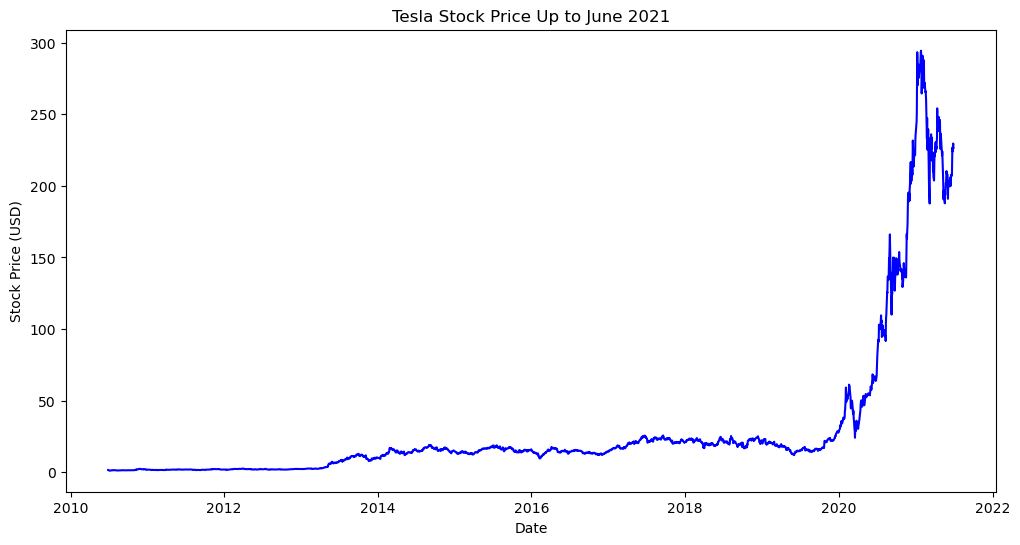

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
def make_graph(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='blue')
    plt.title('Tesla Stock Price Up to June 2021')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    
make_graph(tesla_data)


## Question 6: Plot GameStop Stock Graph
Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


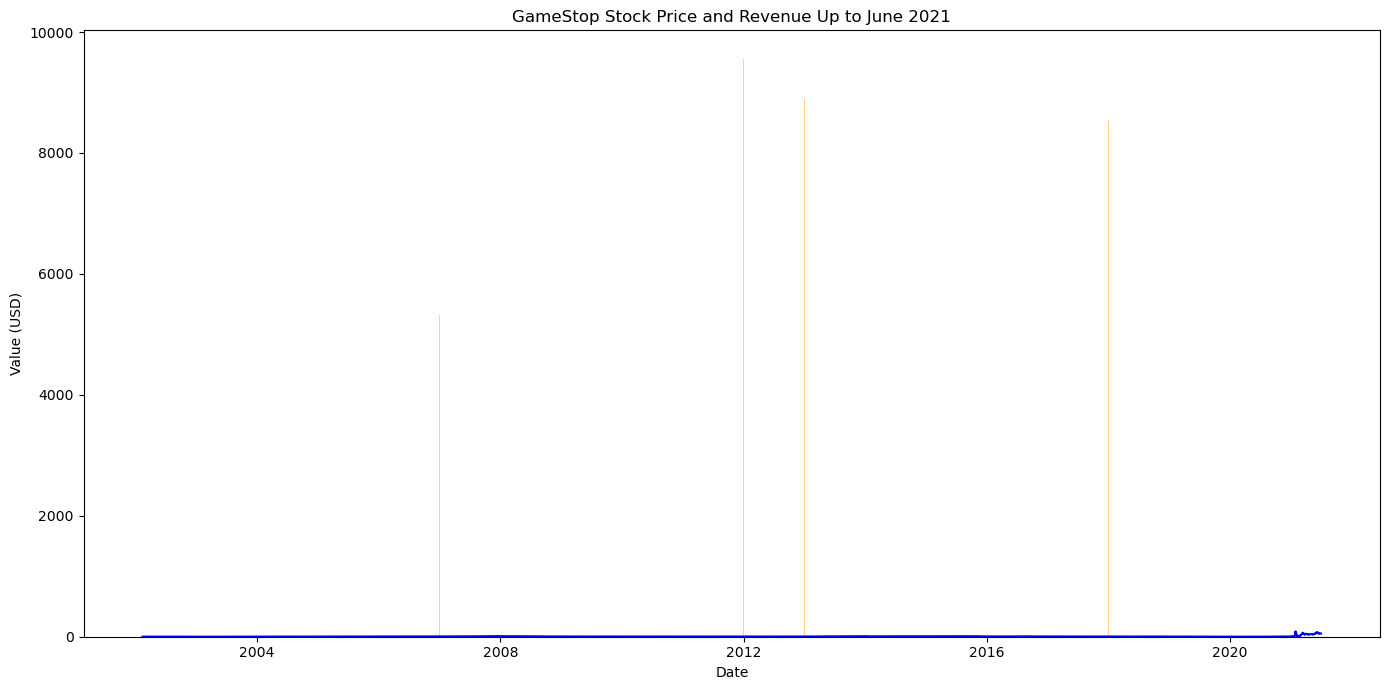

In [33]:
import matplotlib.pyplot as plt

gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']


def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

    
    plt.plot(stock_data['Date'], stock_data['Close'], label='GameStop Stock Price', color='blue')
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange', alpha=0.5)

   
    plt.title(f'{title} Stock Price and Revenue Up to June 2021')
    plt.xlabel('Date')
    plt.ylabel('Value (USD)')
  
    plt.tight_layout()
    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop')